# 11. XGBoost Model

**Mô hình:** XGBoost (Extreme Gradient Boosting)

**Thư viện:** xgboost.XGBRegressor

**Metrics:** RMSFE, MAPE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import warnings
import sys
import os

# Add utils to path
sys.path.append(os.path.join('..', 'utils'))
from metrics import rmsfe, mape

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load processed data
train_df = pd.read_csv('../data/processed/train_clean.csv')
test_df = pd.read_csv('../data/processed/test_clean.csv')

# Separate features and target
X_train = train_df.drop('Core CPI', axis=1)
y_train = train_df['Core CPI']
X_test = test_df.drop('Core CPI', axis=1)
y_test = test_df['Core CPI']

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nFeatures ({len(X_train.columns)}):")
print(X_train.columns.tolist())
print(f"\nTarget variable range:")
print(f"  Train: [{y_train.min():.4f}, {y_train.max():.4f}]")
print(f"  Test:  [{y_test.min():.4f}, {y_test.max():.4f}]")

Training set size: (112, 189)
Test set size: (28, 189)

Features (189):
['Headline CPI_lag_1', 'Headline CPI_lag_2', 'Headline CPI_lag_3', 'Terms of Trade - Exports_lag_1', 'Terms of Trade - Exports_lag_2', 'Terms of Trade - Exports_lag_3', 'Terms of Trade - Imports_lag_1', 'Terms of Trade - Imports_lag_2', 'Terms of Trade - Imports_lag_3', 'Chicken Placements (thousands)_lag_1', 'Chicken Placements (thousands)_lag_2', 'Chicken Placements (thousands)_lag_3', 'Private Credit - ME - Consumption (mill US$)_lag_1', 'Private Credit - ME - Consumption (mill US$)_lag_2', 'Private Credit - ME - Consumption (mill US$)_lag_3', 'Private Credit - MN - Consumption (mill S/)_lag_1', 'Private Credit - MN - Consumption (mill S/)_lag_2', 'Private Credit - MN - Consumption (mill S/)_lag_3', 'Private Credit - MN - Mortgage (mill S/)_lag_1', 'Private Credit - MN - Mortgage (mill S/)_lag_2', 'Private Credit - MN - Mortgage (mill S/)_lag_3', 'Capacity Utilization - Food & Beverages_lag_1', 'Capacity Utiliza

In [3]:
# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

print("XGBoost Hyperparameter Grid Search")
print("="*70)
print(f"Total combinations: {np.prod([len(v) for v in param_grid.values()])}")
print("\nParameter grid:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

# Initialize XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Perform grid search with cross-validation
print("\nPerforming Grid Search with 5-Fold Cross-Validation...")
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

print("\n" + "="*70)
print("GRID SEARCH COMPLETED")
print("="*70)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score (neg MSE): {grid_search.best_score_:.6f}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.6f}")

# Get the best model
best_xgb = grid_search.best_estimator_
print("\n✓ Best XGBoost model obtained!")

XGBoost Hyperparameter Grid Search
Total combinations: 324

Parameter grid:
  n_estimators: [100, 200, 300]
  max_depth: [3, 5, 7]
  learning_rate: [0.01, 0.05, 0.1]
  subsample: [0.8, 1.0]
  colsample_bytree: [0.8, 1.0]
  min_child_weight: [1, 3, 5]

Performing Grid Search with 5-Fold Cross-Validation...
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

GRID SEARCH COMPLETED
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best CV score (neg MSE): -0.319405
Best CV RMSE: 0.565159

✓ Best XGBoost model obtained!

GRID SEARCH COMPLETED
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best CV score (neg MSE): -0.319405
Best CV RMSE: 0.565159

✓ Best XGBoost model obtained!


Feature Importance (Top 20)
                                                  feature  importance
                                       Headline CPI_lag_3    0.277475
 Macroeconomic Expectations - Inflation (12 months)_lag_1    0.130834
            Private Fixed Investment (mill S/ 2007)_lag_3    0.108006
                                       Headline CPI_lag_2    0.095059
           Private Credit - MN - Mortgage (mill S/)_lag_3    0.057734
           Private Credit - MN - Mortgage (mill S/)_lag_1    0.037106
           Private Credit - MN - Mortgage (mill S/)_lag_2    0.031600
                   GDP Growth - Commerce (annual %)_lag_3    0.025824
GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_2    0.023384
 Macroeconomic Expectations - Inflation (12 months)_lag_3    0.021761
 Macroeconomic Expectations - Inflation (12 months)_lag_2    0.013193
            Capacity Utilization - Food & Beverages_lag_3    0.012434
GDP by Expenditure - Domestic Demand (mill S/ 2007)_lag_1    0

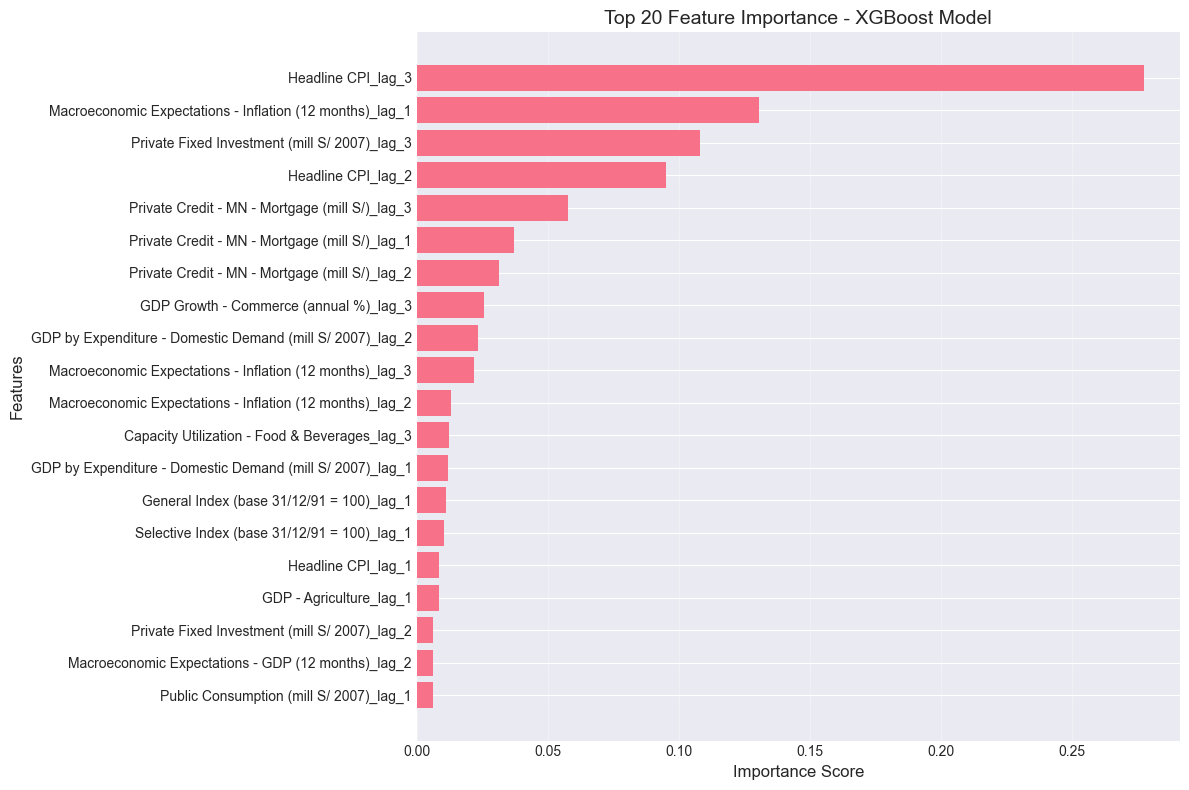


Number of features explaining 90% of importance: 20


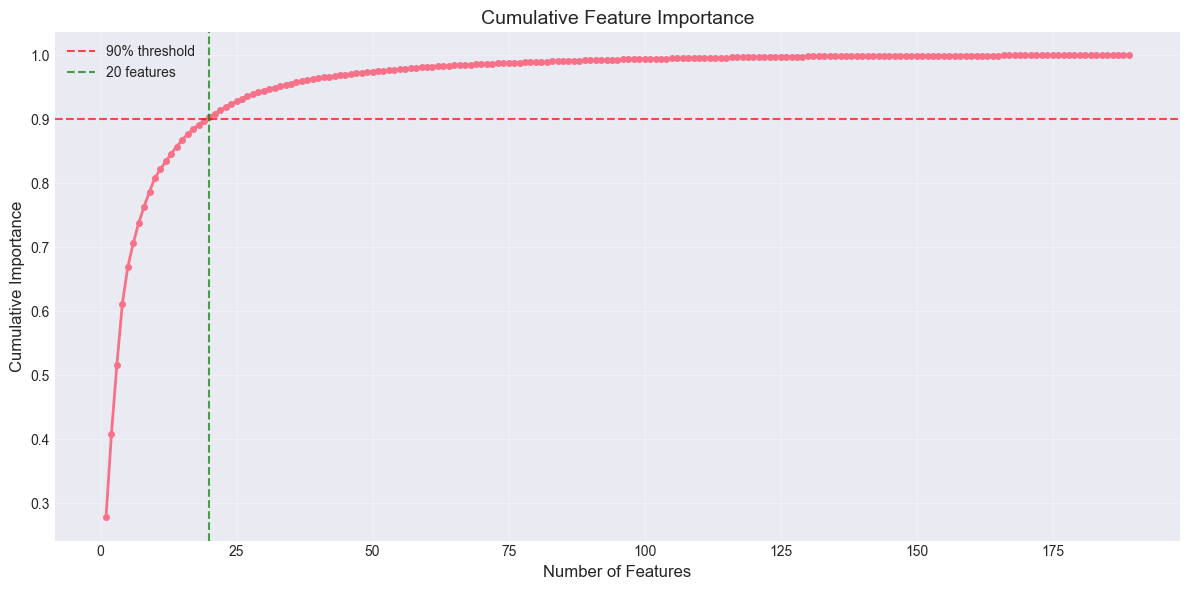

In [4]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Top 20)")
print("="*70)
print(feature_importance.head(20).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Feature Importance - XGBoost Model', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../results/figures/xgboost_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Cumulative importance
feature_importance['cumulative_importance'] = feature_importance['importance'].cumsum()
n_features_90 = (feature_importance['cumulative_importance'] <= 0.9).sum() + 1
print(f"\nNumber of features explaining 90% of importance: {n_features_90}")

# Plot cumulative importance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(feature_importance) + 1), 
         feature_importance['cumulative_importance'], 
         linewidth=2, marker='o', markersize=4)
plt.axhline(y=0.9, color='red', linestyle='--', alpha=0.7, label='90% threshold')
plt.axvline(x=n_features_90, color='green', linestyle='--', alpha=0.7, 
            label=f'{n_features_90} features')
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cumulative Importance', fontsize=12)
plt.title('Cumulative Feature Importance', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/xgboost_cumulative_importance.png', dpi=300, bbox_inches='tight')
plt.show()

XGBOOST MODEL EVALUATION

Training Set:
  RMSFE: 0.001909
  MAPE:  1.963982

Test Set:
  RMSFE: 1.992207
  MAPE:  81.119264


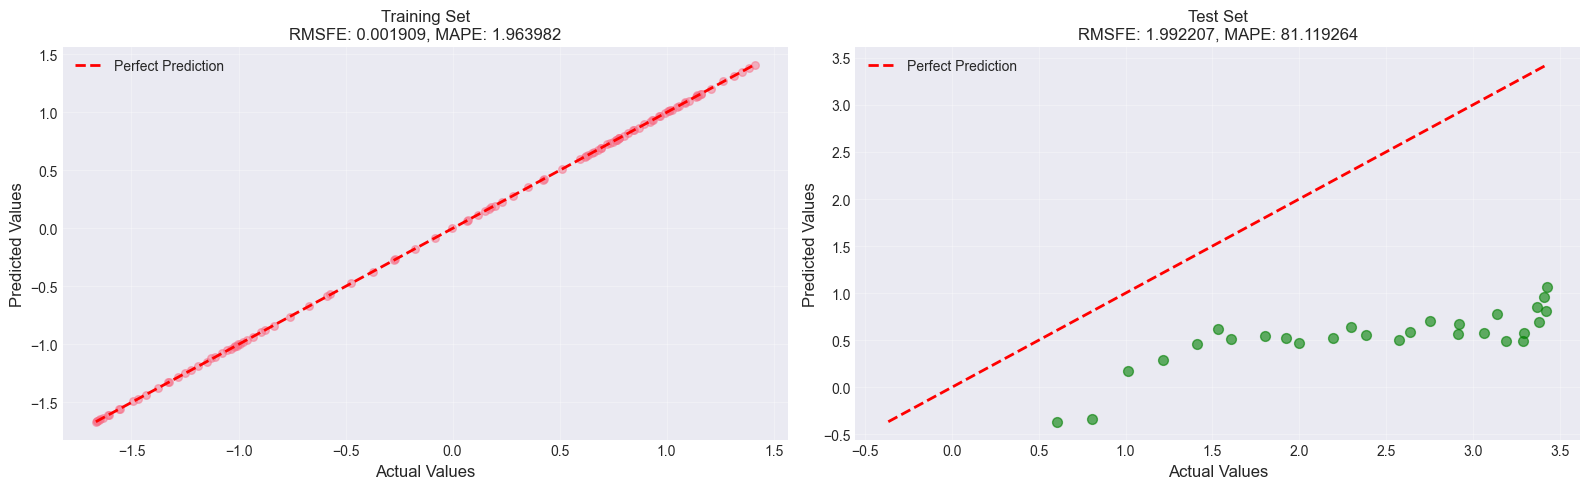

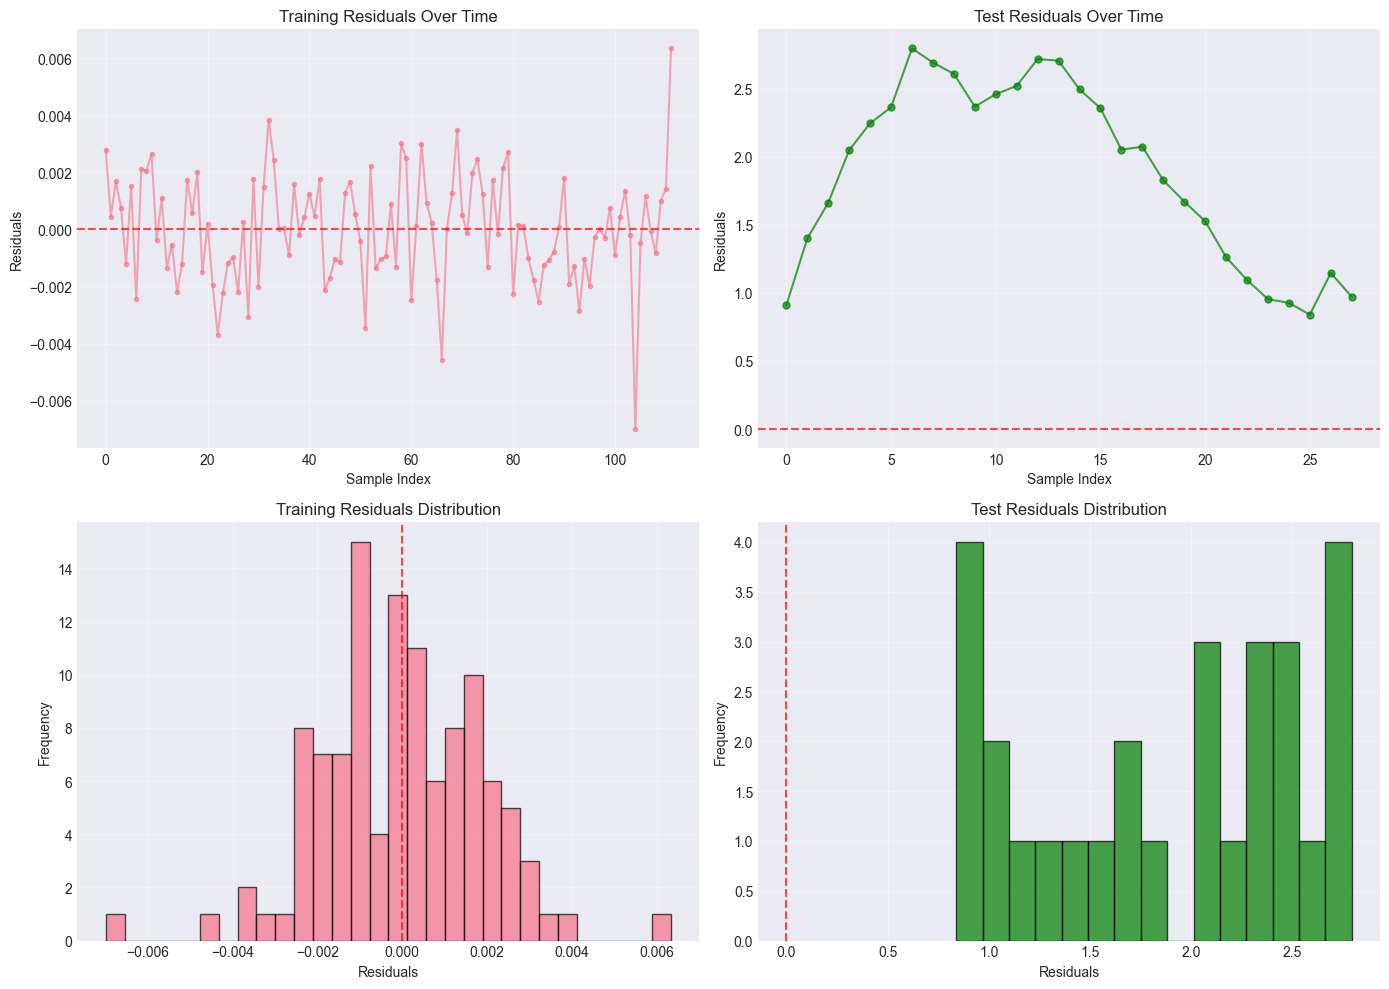


Residual Statistics:
----------------------------------------------------------------------
Metric               Training             Test                
----------------------------------------------------------------------
Mean                 -0.000006            1.881061            
Std Dev              0.001917             0.668165            
Min                  -0.006995            0.839814            
Max                  0.006343             2.794789            
Median               0.000025             2.049041            
----------------------------------------------------------------------


In [5]:
# Make predictions
y_train_pred = best_xgb.predict(X_train)
y_test_pred = best_xgb.predict(X_test)

# Calculate metrics
train_rmsfe = rmsfe(y_train, y_train_pred)
train_mape = mape(y_train, y_train_pred)
test_rmsfe = rmsfe(y_test, y_test_pred)
test_mape = mape(y_test, y_test_pred)

print("="*70)
print("XGBOOST MODEL EVALUATION")
print("="*70)
print(f"\nTraining Set:")
print(f"  RMSFE: {train_rmsfe:.6f}")
print(f"  MAPE:  {train_mape:.6f}")
print(f"\nTest Set:")
print(f"  RMSFE: {test_rmsfe:.6f}")
print(f"  MAPE:  {test_mape:.6f}")
print("="*70)

# Plot predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Values', fontsize=12)
axes[0].set_ylabel('Predicted Values', fontsize=12)
axes[0].set_title(f'Training Set\nRMSFE: {train_rmsfe:.6f}, MAPE: {train_mape:.6f}', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, s=50, color='green')
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Values', fontsize=12)
axes[1].set_ylabel('Predicted Values', fontsize=12)
axes[1].set_title(f'Test Set\nRMSFE: {test_rmsfe:.6f}, MAPE: {test_mape:.6f}', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/xgboost_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual analysis
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Training residuals over time
axes[0, 0].plot(train_residuals, marker='o', linestyle='-', alpha=0.6, markersize=3)
axes[0, 0].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[0, 0].set_title('Training Residuals Over Time', fontsize=12)
axes[0, 0].set_xlabel('Sample Index', fontsize=10)
axes[0, 0].set_ylabel('Residuals', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Test residuals over time
axes[0, 1].plot(test_residuals, marker='o', linestyle='-', alpha=0.7, markersize=5, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
axes[0, 1].set_title('Test Residuals Over Time', fontsize=12)
axes[0, 1].set_xlabel('Sample Index', fontsize=10)
axes[0, 1].set_ylabel('Residuals', fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

# Training residuals distribution
axes[1, 0].hist(train_residuals, bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 0].set_title('Training Residuals Distribution', fontsize=12)
axes[1, 0].set_xlabel('Residuals', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Test residuals distribution
axes[1, 1].hist(test_residuals, bins=15, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
axes[1, 1].set_title('Test Residuals Distribution', fontsize=12)
axes[1, 1].set_xlabel('Residuals', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/xgboost_residuals.png', dpi=300, bbox_inches='tight')
plt.show()

# Residual statistics
print("\nResidual Statistics:")
print("-" * 70)
print(f"{'Metric':<20} {'Training':<20} {'Test':<20}")
print("-" * 70)
print(f"{'Mean':<20} {train_residuals.mean():<20.6f} {test_residuals.mean():<20.6f}")
print(f"{'Std Dev':<20} {train_residuals.std():<20.6f} {test_residuals.std():<20.6f}")
print(f"{'Min':<20} {train_residuals.min():<20.6f} {test_residuals.min():<20.6f}")
print(f"{'Max':<20} {train_residuals.max():<20.6f} {test_residuals.max():<20.6f}")
print(f"{'Median':<20} {np.median(train_residuals):<20.6f} {np.median(test_residuals):<20.6f}")
print("-" * 70)

In [6]:
# Save predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred,
    'Residual': test_residuals
})
predictions_df.to_csv('../results/tables/xgboost_predictions.csv', index=False)
print("✓ Predictions saved to: ../results/tables/xgboost_predictions.csv")

# Save feature importance
feature_importance.to_csv('../results/tables/xgboost_feature_importance.csv', index=False)
print("✓ Feature importance saved to: ../results/tables/xgboost_feature_importance.csv")

# Save grid search results
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results_summary = grid_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].copy()
grid_results_summary['mean_test_rmse'] = np.sqrt(-grid_results_summary['mean_test_score'])
grid_results_summary = grid_results_summary.sort_values('rank_test_score')
grid_results_summary.to_csv('../results/tables/xgboost_grid_search.csv', index=False)
print("✓ Grid search results saved to: ../results/tables/xgboost_grid_search.csv")

# Save metrics summary
metrics_summary = pd.DataFrame({
    'Model': ['XGBoost'],
    'Train_RMSFE': [train_rmsfe],
    'Train_MAPE': [train_mape],
    'Test_RMSFE': [test_rmsfe],
    'Test_MAPE': [test_mape],
    'Best_Params': [str(grid_search.best_params_)],
    'CV_RMSE': [np.sqrt(-grid_search.best_score_)]
})
metrics_summary.to_csv('../results/tables/xgboost_metrics.csv', index=False)
print("✓ Metrics summary saved to: ../results/tables/xgboost_metrics.csv")

# Display final summary
print("\n" + "="*70)
print("XGBOOST MODEL SUMMARY")
print("="*70)
print(f"\nBest Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nCross-Validation RMSE: {np.sqrt(-grid_search.best_score_):.6f}")
print(f"\nFinal Test Set Performance:")
print(f"  RMSFE: {test_rmsfe:.6f}")
print(f"  MAPE:  {test_mape:.6f}")
print(f"\nTop 5 Most Important Features:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"  {row['feature']}: {row['importance']:.4f}")
print("="*70)

print("\n✅ XGBoost model training and evaluation completed successfully!")

✓ Predictions saved to: ../results/tables/xgboost_predictions.csv
✓ Feature importance saved to: ../results/tables/xgboost_feature_importance.csv
✓ Grid search results saved to: ../results/tables/xgboost_grid_search.csv
✓ Metrics summary saved to: ../results/tables/xgboost_metrics.csv

XGBOOST MODEL SUMMARY

Best Hyperparameters:
  colsample_bytree: 0.8
  learning_rate: 0.05
  max_depth: 3
  min_child_weight: 1
  n_estimators: 300
  subsample: 0.8

Cross-Validation RMSE: 0.565159

Final Test Set Performance:
  RMSFE: 1.992207
  MAPE:  81.119264

Top 5 Most Important Features:
  Headline CPI_lag_3: 0.2775
  Macroeconomic Expectations - Inflation (12 months)_lag_1: 0.1308
  Private Fixed Investment (mill S/ 2007)_lag_3: 0.1080
  Headline CPI_lag_2: 0.0951
  Private Credit - MN - Mortgage (mill S/)_lag_3: 0.0577

✅ XGBoost model training and evaluation completed successfully!
